In [2]:
from ibm_botocore.client import Config
import ibm_boto3

In [1]:
def upload_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.upload_file(Filename=local_file_name, Bucket=credentials['BUCKET'],Key=key)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Uploaded')

In [3]:
def download_file_cos(credentials,local_file_name,key):  
    cos = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=credentials['IBM_API_KEY_ID'],
    ibm_service_instance_id=credentials['IAM_SERVICE_ID'],
    ibm_auth_endpoint=credentials['IBM_AUTH_ENDPOINT'],
    config=Config(signature_version='oauth'),
    endpoint_url=credentials['ENDPOINT'])
    try:
        res=cos.download_file(Bucket=credentials['BUCKET'],Key=key,Filename=local_file_name)
    except Exception as e:
        print(Exception, e)
    else:
        print('File Downloaded')

In [4]:
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_3 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-e5e81556-000f-4d93-86d4-b60748f7fe20',
    'IBM_API_KEY_ID': 'aNSEN31wTP6yZ20pw5EHvlrvMRBa1wK97un-2eiazXn5',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.bluemix.net/oidc/token',
    'BUCKET': 'courseracapstone-donotdelete-pr-5lsxokvrardkjz',
    'FILE': 'Neighborhoods.csv'
}

In [5]:
!pip install fiona==1.8.6
#!conda install --channel conda-forge fiona=1.8.6 --yes
#!conda upgrade geopandas fiona --yes

     |████████████████████████████████| 17.9MB 13.4MB/s eta 0:00:01
  Found existing installation: Fiona 1.8.4
    Uninstalling Fiona-1.8.4:
      Successfully uninstalled Fiona-1.8.4


In [6]:
#!conda list

In [7]:
import pandas as pd
import numpy as np
import geopandas
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
from geopandas import GeoDataFrame
import geoplot
import geopy
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
#from scipy import stats
import seaborn as sns
%matplotlib inline

In [8]:
#!conda install --channel conda-forge ipywidgets nodejs --yes
import ipywidgets

In [9]:
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
#from geopy.geocoders import Nominatim
import json
import fiona

In [10]:
from pathlib import Path
from zipfile import ZipFile
from io import BytesIO  

In [11]:
from arcgis.gis import GIS
from arcgis.geocoding import Geocoder,  geocode

from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry

from geopandas import GeoDataFrame

In [12]:
download_file_cos(credentials_3,'WA_gdf_1.geojson','WA_gdf_1.geojson')
WA_gdf_1 = geopandas.read_file('WA_gdf_1.geojson')

File Downloaded


In [13]:
#!conda install --channel conda-forge fiona --yes
#import fiona
#fiona.supported_drivers

In [14]:
url = "https://gisdata.kingcounty.gov/arcgis/rest/services/OpenDataPortal/transportation___base/MapServer/384/query?where=1%3D1&outFields=*&outSR=4326&f=json"
#url = "https://opendata.arcgis.com/datasets/17418ff4986440dcb7058b1c6533e94b_384.zip"
#df_SEA = geopandas.read_file(url)
data = requests.get(url)
b = bytes(data.content)
with fiona.BytesCollection(b) as f:
    crs = f.crs
    df_SEA = geopandas.GeoDataFrame.from_features(f, crs=crs)
    print(df_SEA.head())
#df_SEA = geopandas.GeoDataFrame(data.json())
#df_SEA.head()

       NEIGHBORHOOD_NAME  NEIGH_NUM  OBJECTID    SHAPE_Area  SHAPE_Length  \
0    University District         37         1  4.948493e+07  40436.205860   
1            Wallingford         38         2  4.210762e+07  32080.778300   
2               Interbay        101         3  3.372042e+07  59930.630161   
3  West Campus - Fed Way        227         4  6.639272e+07  36341.429112   
4         Berkshire Glen        245         5  7.048653e+06  10597.297569   

                                            geometry  
0  POLYGON ((-122.3189590288485 47.67250069638226...  
1  POLYGON ((-122.346114180476 47.66505276831814,...  
2  POLYGON ((-122.397942744914 47.66481700558359,...  
3  POLYGON ((-122.348030734308 47.3151893486264, ...  
4  POLYGON ((-122.1764963769378 47.32992973688438...  


In [15]:
fig = plt.figure(figsize=(60,36))
plt.rcParams['figure.figsize'] = (60,36)

<Figure size 4320x2592 with 0 Axes>

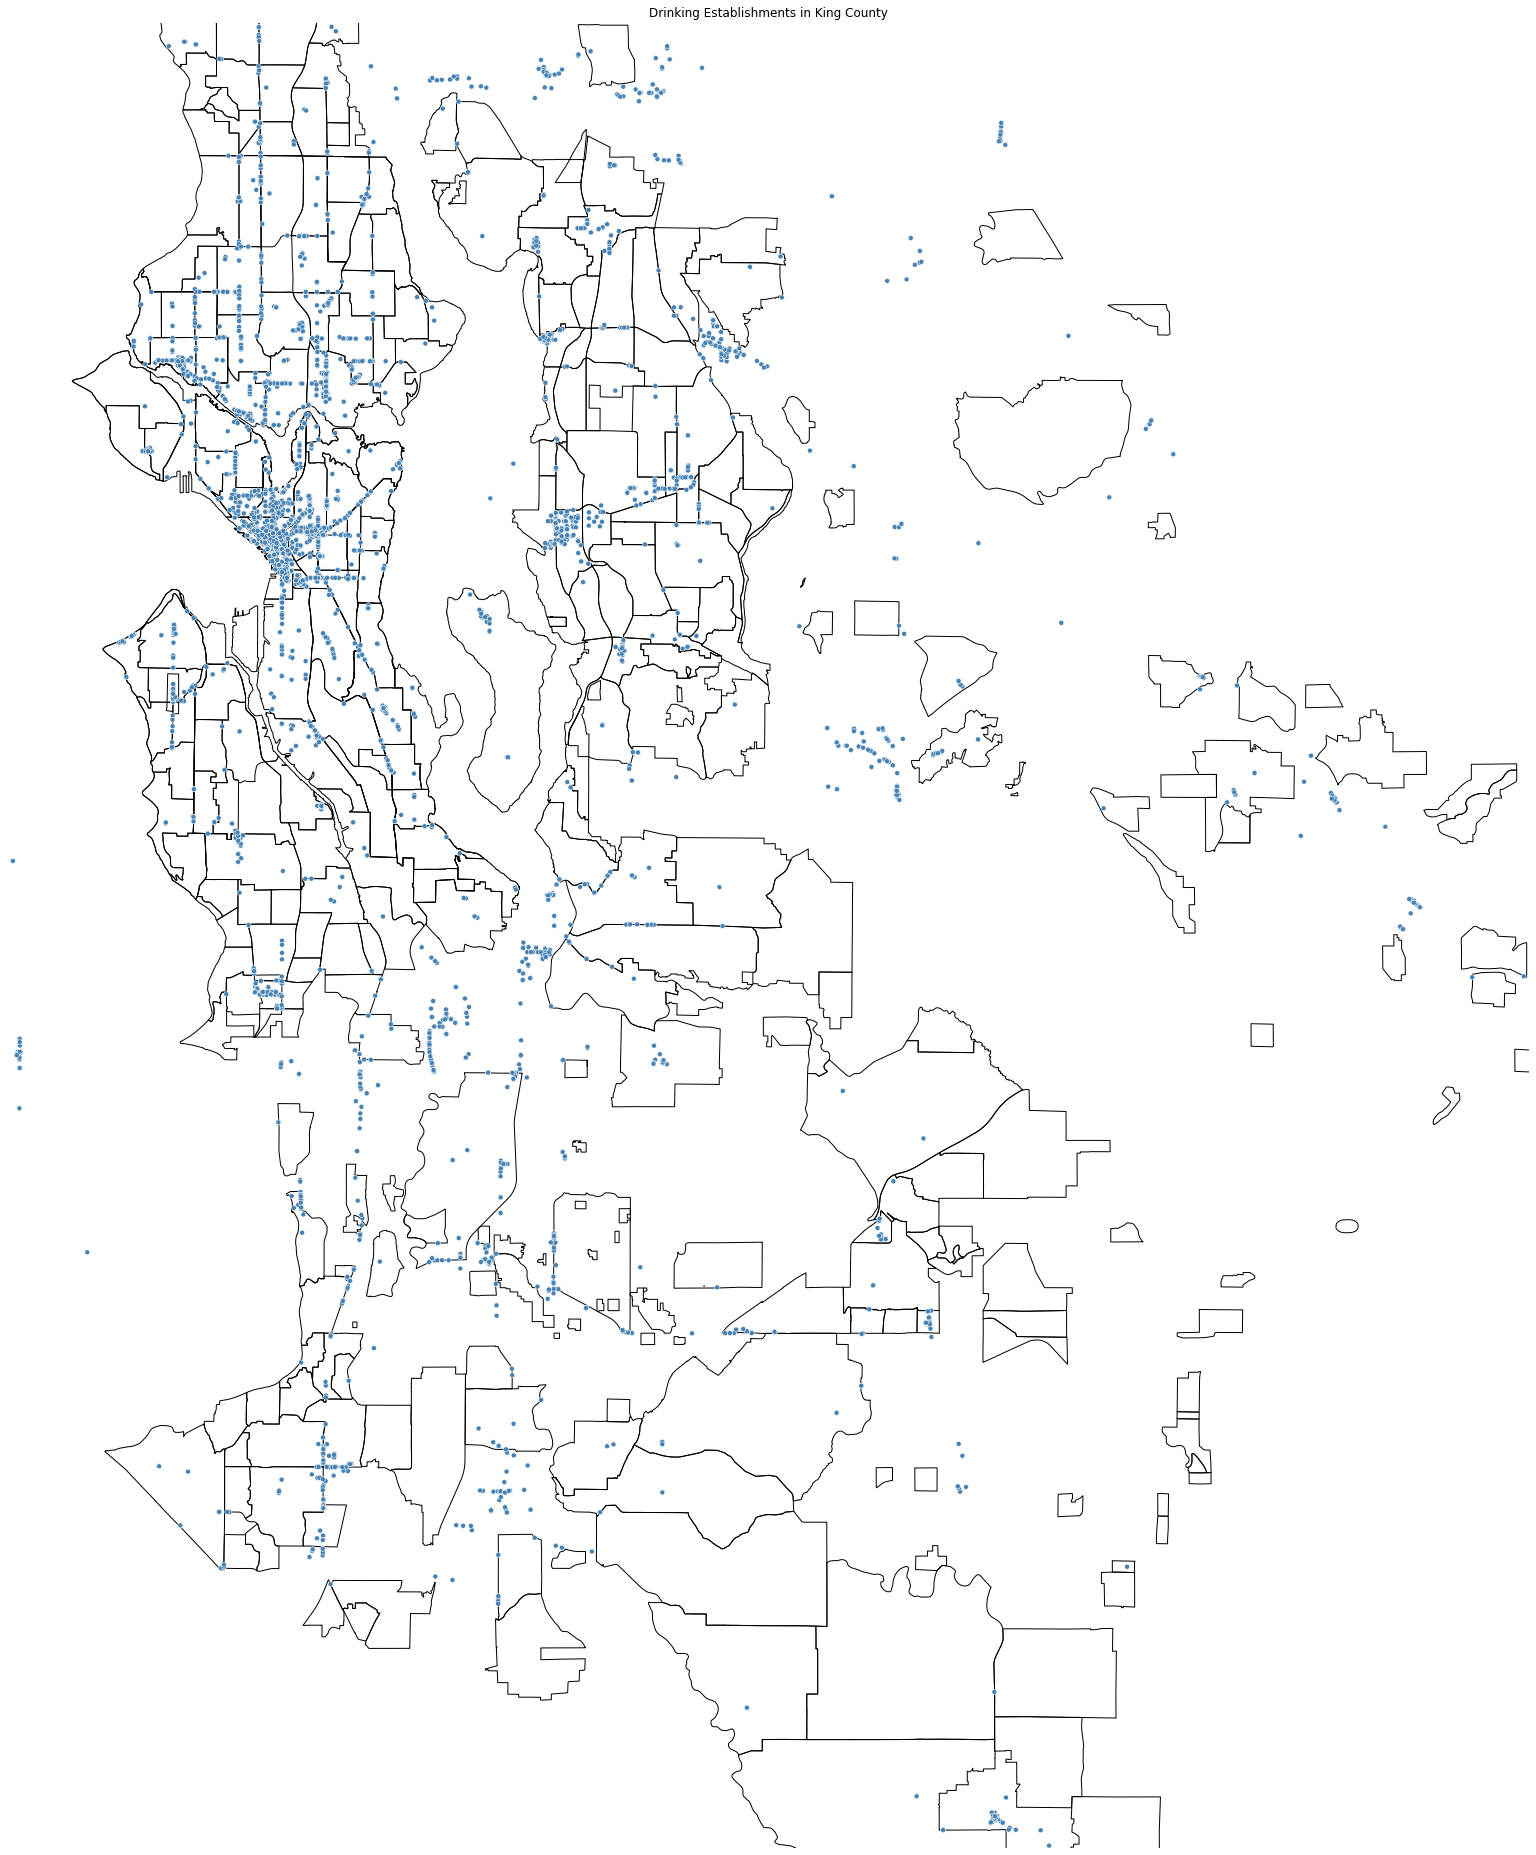

In [16]:
ax1 = plt.subplot(121, projection=gcrs.AlbersEqualArea(central_latitude=47.5, central_longitude=-122.1))
geoplot.polyplot(df_SEA, ax=ax1, projection=gcrs.AlbersEqualArea())
geoplot.pointplot(WA_gdf_1, projection=gcrs.AlbersEqualArea(),
#               hue='Loc City', categorical=True,
               edgecolor='white', linewidth=0.5, zorder=10,
#               scale='NUMBER OF DRINKING ESTABLISMENTS', 
#                limits=(2, 8),
#               legend=True, legend_var='scale', legend_kwargs={'loc': 'upper right'},
#              legend_values=[2, 1], 
#                 legend_labels=['2 Establishments', '1 Establishment'],
               ax=ax1)
plt.title("Drinking Establishments in King County")

plt.savefig("King_County_Dist.png", bbox_inches='tight', pad_inches=0)

In [21]:
upload_file_cos(credentials_3,'King_County_Dist.png','King_County_Dist.png')

File Uploaded


In [15]:
type(df_SEA)

geopandas.geodataframe.GeoDataFrame

In [23]:
print(WA_gdf_1.head())

                                       Tradename  \
0  'AMONOS! MEXICAN KITCHEN                        
1  /NA:M/ THAI CUISINE                             
2  00 PIZZA                                        
3  028 BARBER SHOP                                 
4  108 VIETNAMESE CAJUN CRAWFISH BROILER           

                      Loc Address                  Loc City Loc St    Loc Zip  \
0  15321 MAIN ST NE STE 201        DUVALL                       WA  980198574   
1  1404 34TH AVE                   SEATTLE                      WA  981223334   
2  31217 124TH AVE SE STE 6        AUBURN                       WA  980923618   
3  14031 NE WOODINVILLE DUVALL RD  WOODINVILLE                  WA  980728504   
4  18114 E VALLEY HWY              KENT                         WA  980321001   

   Business Startup Date                            Privilege County  \
0               20180327  BEER/WINE REST - BEER/WINE            KING   
1               20090608  SPIRITS/BR/WN REST LOUNGE +   

In [16]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint

In [17]:
from shapely.geometry import Point

In [18]:
#df = pd.read_csv('summer-travel-gps-full.csv')
coords = WA_gdf_1.as_matrix(columns=['lat', 'long'])

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


In [19]:
print(coords)

[[  47.73896623 -121.98671592]
 [  47.61308524 -122.28926283]
 [  47.32188233 -122.17647451]
 ...
 [  47.30758255 -122.22391136]
 [  47.76031252 -122.20243475]
 [  47.55126036 -122.04342674]]


In [20]:
kms_per_radian = 6371.0088
epsilon = 0.4 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=30, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 14


In [21]:
print(clusters)

0     [[47.618253, -122.20167021099995], [47.6102265...
1     [[47.619369, -122.33594124099994], [47.619369,...
2     [[47.651678612000076, -122.34997178399999], [4...
3     [[47.66864948100005, -122.3881605], [47.668185...
4     [[47.67649723800008, -122.20778715699998], [47...
5     [[47.560982342000045, -122.38575980499996], [4...
6     [[47.67010082700006, -122.12147222599998], [47...
7     [[47.46674151100007, -122.34638233199995], [47...
8     [[47.69175541300007, -122.35534331299999], [47...
9     [[47.66173166500005, -122.31835220099998], [47...
10    [[47.479383450000064, -122.207870573], [47.479...
11    [[47.661336525000074, -122.33113127699993], [4...
12    [[47.44825, -122.29844], [47.44825, -122.29844...
13                                                   []
dtype: object


In [60]:
clusters.shape

(14,)

In [22]:

clustersub = clusters[0:-1,]
print(clustersub)

0     [[47.618253, -122.20167021099995], [47.6102265...
1     [[47.619369, -122.33594124099994], [47.619369,...
2     [[47.651678612000076, -122.34997178399999], [4...
3     [[47.66864948100005, -122.3881605], [47.668185...
4     [[47.67649723800008, -122.20778715699998], [47...
5     [[47.560982342000045, -122.38575980499996], [4...
6     [[47.67010082700006, -122.12147222599998], [47...
7     [[47.46674151100007, -122.34638233199995], [47...
8     [[47.69175541300007, -122.35534331299999], [47...
9     [[47.66173166500005, -122.31835220099998], [47...
10    [[47.479383450000064, -122.207870573], [47.479...
11    [[47.661336525000074, -122.33113127699993], [4...
12    [[47.44825, -122.29844], [47.44825, -122.29844...
dtype: object


In [36]:
print(len(clustersub[0]))
print(len(clustersub[1]))
print(len(clustersub[2]))
print(len(clustersub[3]))
print(len(clustersub[4]))
print(len(clustersub[5]))
print(len(clustersub[6]))
print(len(clustersub[7]))
print(len(clustersub[8]))
print(len(clustersub[9]))
print(len(clustersub[10]))
print(len(clustersub[11]))
print(len(clustersub[12]))


141
1010
68
104
53
49
56
44
37
54
33
44
32


In [37]:
print(df_SEA)

               NEIGHBORHOOD_NAME  NEIGH_NUM  OBJECTID    SHAPE_Area  \
0            University District         37         1  4.948493e+07   
1                    Wallingford         38         2  4.210762e+07   
2                       Interbay        101         3  3.372042e+07   
3          West Campus - Fed Way        227         4  6.639272e+07   
4                 Berkshire Glen        245         5  7.048653e+06   
5                 Kent East Hill         19         6  1.211936e+08   
6                         Buenna        230         7  1.653579e+07   
7                  North Redmond        338         8  4.405287e+07   
8                    Christopher        241         9  6.427862e+07   
9                 Matthews Beach         77        10  3.101098e+07   
10          Redondo - Des Moines        197        11  1.206783e+07   
11                Salt Air Hills        212        12  2.744784e+06   
12                   Autumn Glen        213        13  3.986859e+05   
13    

In [38]:
df_Central_Business_District = pd.DataFrame(clustersub[1], columns =['CBD_Lat', 'CBD_Long']) 

In [40]:
df_Central_Business_District.head()

,CBD_Lat,CBD_Long
0,47.619369,-122.335941
1,47.619369,-122.335941
2,47.619369,-122.335941
3,47.619369,-122.335941
4,47.598268,-122.331042


In [41]:
geometry = [Point(xy) for xy in zip(df_Central_Business_District["CBD_Long"],df_Central_Business_District["CBD_Lat"] )]
crs = {'init': 'epsg:2285'} #http://www.spatialreference.org/ref/epsg/2285/
gdf_Central_Business_District = GeoDataFrame(df_Central_Business_District,crs=crs, geometry=geometry)

In [42]:
gdf_Central_Business_District.head()

,CBD_Lat,CBD_Long,geometry
0,47.619369,-122.335941,POINT (-122.3359412409999 47.619369)
1,47.619369,-122.335941,POINT (-122.3359412409999 47.619369)
2,47.619369,-122.335941,POINT (-122.3359412409999 47.619369)
3,47.619369,-122.335941,POINT (-122.3359412409999 47.619369)
4,47.598268,-122.331042,POINT (-122.331042 47.59826846600004)


In [50]:
gdf_CBD_Shape = df_SEA.loc[df_SEA['NEIGH_NUM'] == 6]
#filtered_df = df.loc[df['NEIGH_NUM'] == '6']

In [51]:
print(gdf_CBD_Shape)

            NEIGHBORHOOD_NAME  NEIGH_NUM  OBJECTID    SHAPE_Area  \
19  Central Business District          6        20  9.490985e+06   

    SHAPE_Length                                           geometry  
19  17166.018531  POLYGON ((-122.3380084616727 47.60830401497107...  


In [43]:
fig = plt.figure(figsize=(60,36))
plt.rcParams['figure.figsize'] = (60,36)

<Figure size 4320x2592 with 0 Axes>

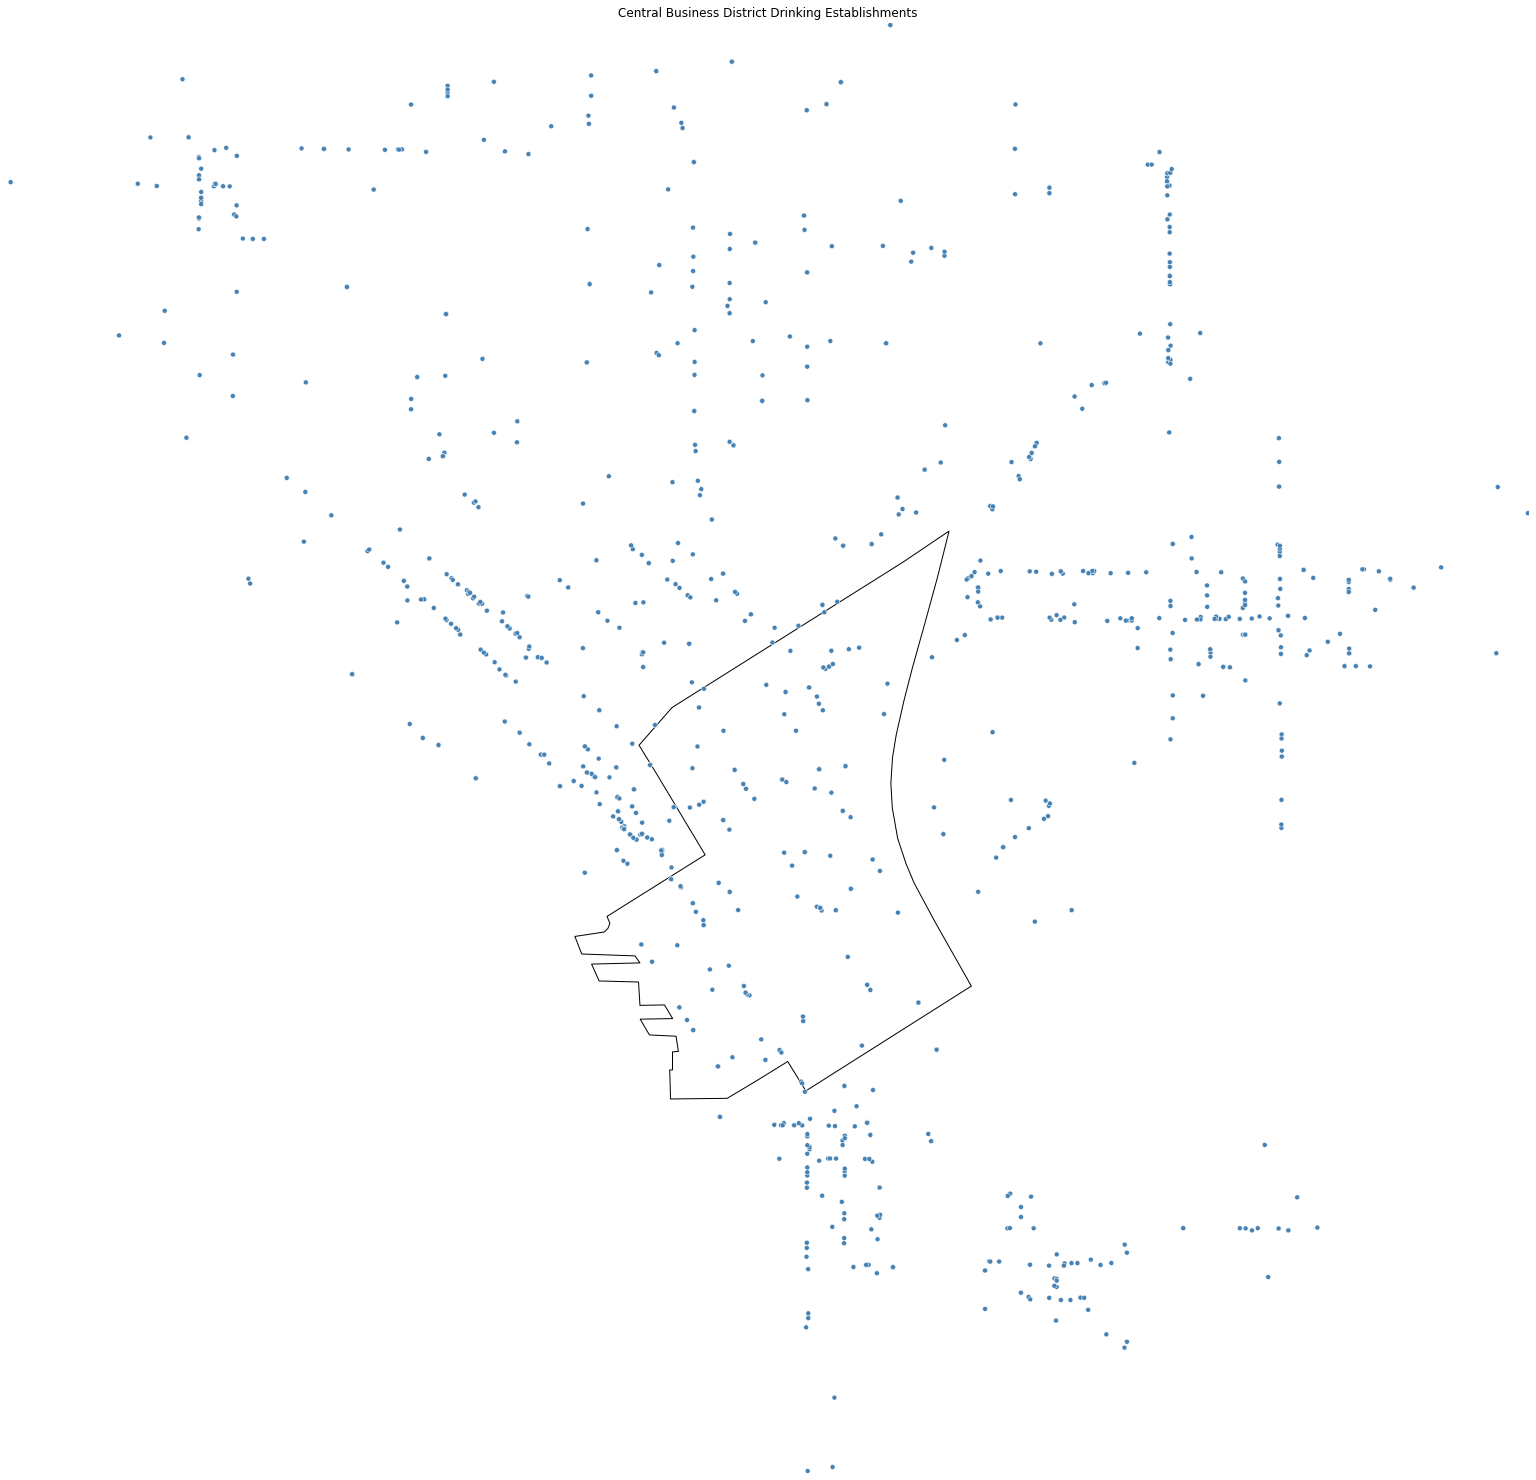

In [52]:
ax1 = plt.subplot(121, projection=gcrs.AlbersEqualArea(central_latitude=47.5, central_longitude=-122.1))
geoplot.polyplot(gdf_CBD_Shape, ax=ax1, projection=gcrs.AlbersEqualArea())
geoplot.pointplot(gdf_Central_Business_District, projection=gcrs.AlbersEqualArea(),
#               hue='Loc City', categorical=True,
               edgecolor='white', linewidth=0.5, zorder=10,
#               scale='NUMBER OF DRINKING ESTABLISMENTS', 
#                limits=(2, 8),
#               legend=True, legend_var='scale', legend_kwargs={'loc': 'upper right'},
#              legend_values=[2, 1], 
#                 legend_labels=['2 Establishments', '1 Establishment'],
               ax=ax1)
plt.title("Central Business District Drinking Establishments")

plt.savefig("CBD_Locations.png", bbox_inches='tight', pad_inches=0)

In [53]:
upload_file_cos(credentials_3,'CBD_Locations.png','CBD_Locations.png')

File Uploaded


In [62]:
def get_centermost_point(cluster):
    centroid = (MultiPoint(cluster).centroid.x, MultiPoint(cluster).centroid.y)
#    centermost_point = min(cluster, key=lambda point: great_circle(point, centroid).m)
    return tuple(centroid)
centroid_points = clustersub.map(get_centermost_point)

In [63]:
print(centroid_points)

0      (47.61533497178016, -122.19926278767379)
1     (47.612882788686235, -122.33420986982972)
2      (47.65080041166183, -122.35191211597053)
3     (47.667483814500045, -122.38343052602885)
4      (47.67600082460381, -122.20594081181132)
5      (47.56181564287759, -122.38641157224488)
6       (47.6723888527322, -122.12136474364283)
7     (47.466851236250044, -122.34159369213636)
8      (47.69026189854057, -122.35575468210806)
9      (47.66034497601857, -122.31401833677774)
10     (47.47952212793945, -122.20779716336364)
11     (47.66144028959098, -122.33720490806819)
12    (47.447715264250036, -122.29781452374999)
dtype: object


In [64]:
df_clustercentroids = pd.DataFrame.from_records([x for x in centroid_points], columns =['lat', 'long']) 
  
print(df_clustercentroids)  

          lat        long
0   47.615335 -122.199263
1   47.612883 -122.334210
2   47.650800 -122.351912
3   47.667484 -122.383431
4   47.676001 -122.205941
5   47.561816 -122.386412
6   47.672389 -122.121365
7   47.466851 -122.341594
8   47.690262 -122.355755
9   47.660345 -122.314018
10  47.479522 -122.207797
11  47.661440 -122.337205
12  47.447715 -122.297815


In [65]:
geometry = [Point(xy) for xy in zip(df_clustercentroids["long"],df_clustercentroids["lat"] )]
crs = {'init': 'epsg:2285'} #http://www.spatialreference.org/ref/epsg/2285/
WA_gdf_clustercentroids = GeoDataFrame(df_clustercentroids,crs=crs, geometry=geometry)

In [66]:
print(WA_gdf_clustercentroids)

          lat        long                                      geometry
0   47.615335 -122.199263  POINT (-122.1992627876738 47.61533497178016)
1   47.612883 -122.334210  POINT (-122.3342098698297 47.61288278868624)
2   47.650800 -122.351912  POINT (-122.3519121159705 47.65080041166183)
3   47.667484 -122.383431  POINT (-122.3834305260288 47.66748381450005)
4   47.676001 -122.205941  POINT (-122.2059408118113 47.67600082460381)
5   47.561816 -122.386412  POINT (-122.3864115722449 47.56181564287759)
6   47.672389 -122.121365   POINT (-122.1213647436428 47.6723888527322)
7   47.466851 -122.341594  POINT (-122.3415936921364 47.46685123625004)
8   47.690262 -122.355755  POINT (-122.3557546821081 47.69026189854057)
9   47.660345 -122.314018  POINT (-122.3140183367777 47.66034497601857)
10  47.479522 -122.207797  POINT (-122.2077971633636 47.47952212793945)
11  47.661440 -122.337205  POINT (-122.3372049080682 47.66144028959098)
12  47.447715 -122.297815    POINT (-122.29781452375 47.44771526

In [67]:
fig = plt.figure(figsize=(60,36))
plt.rcParams['figure.figsize'] = (60,36)

<Figure size 4320x2592 with 0 Axes>

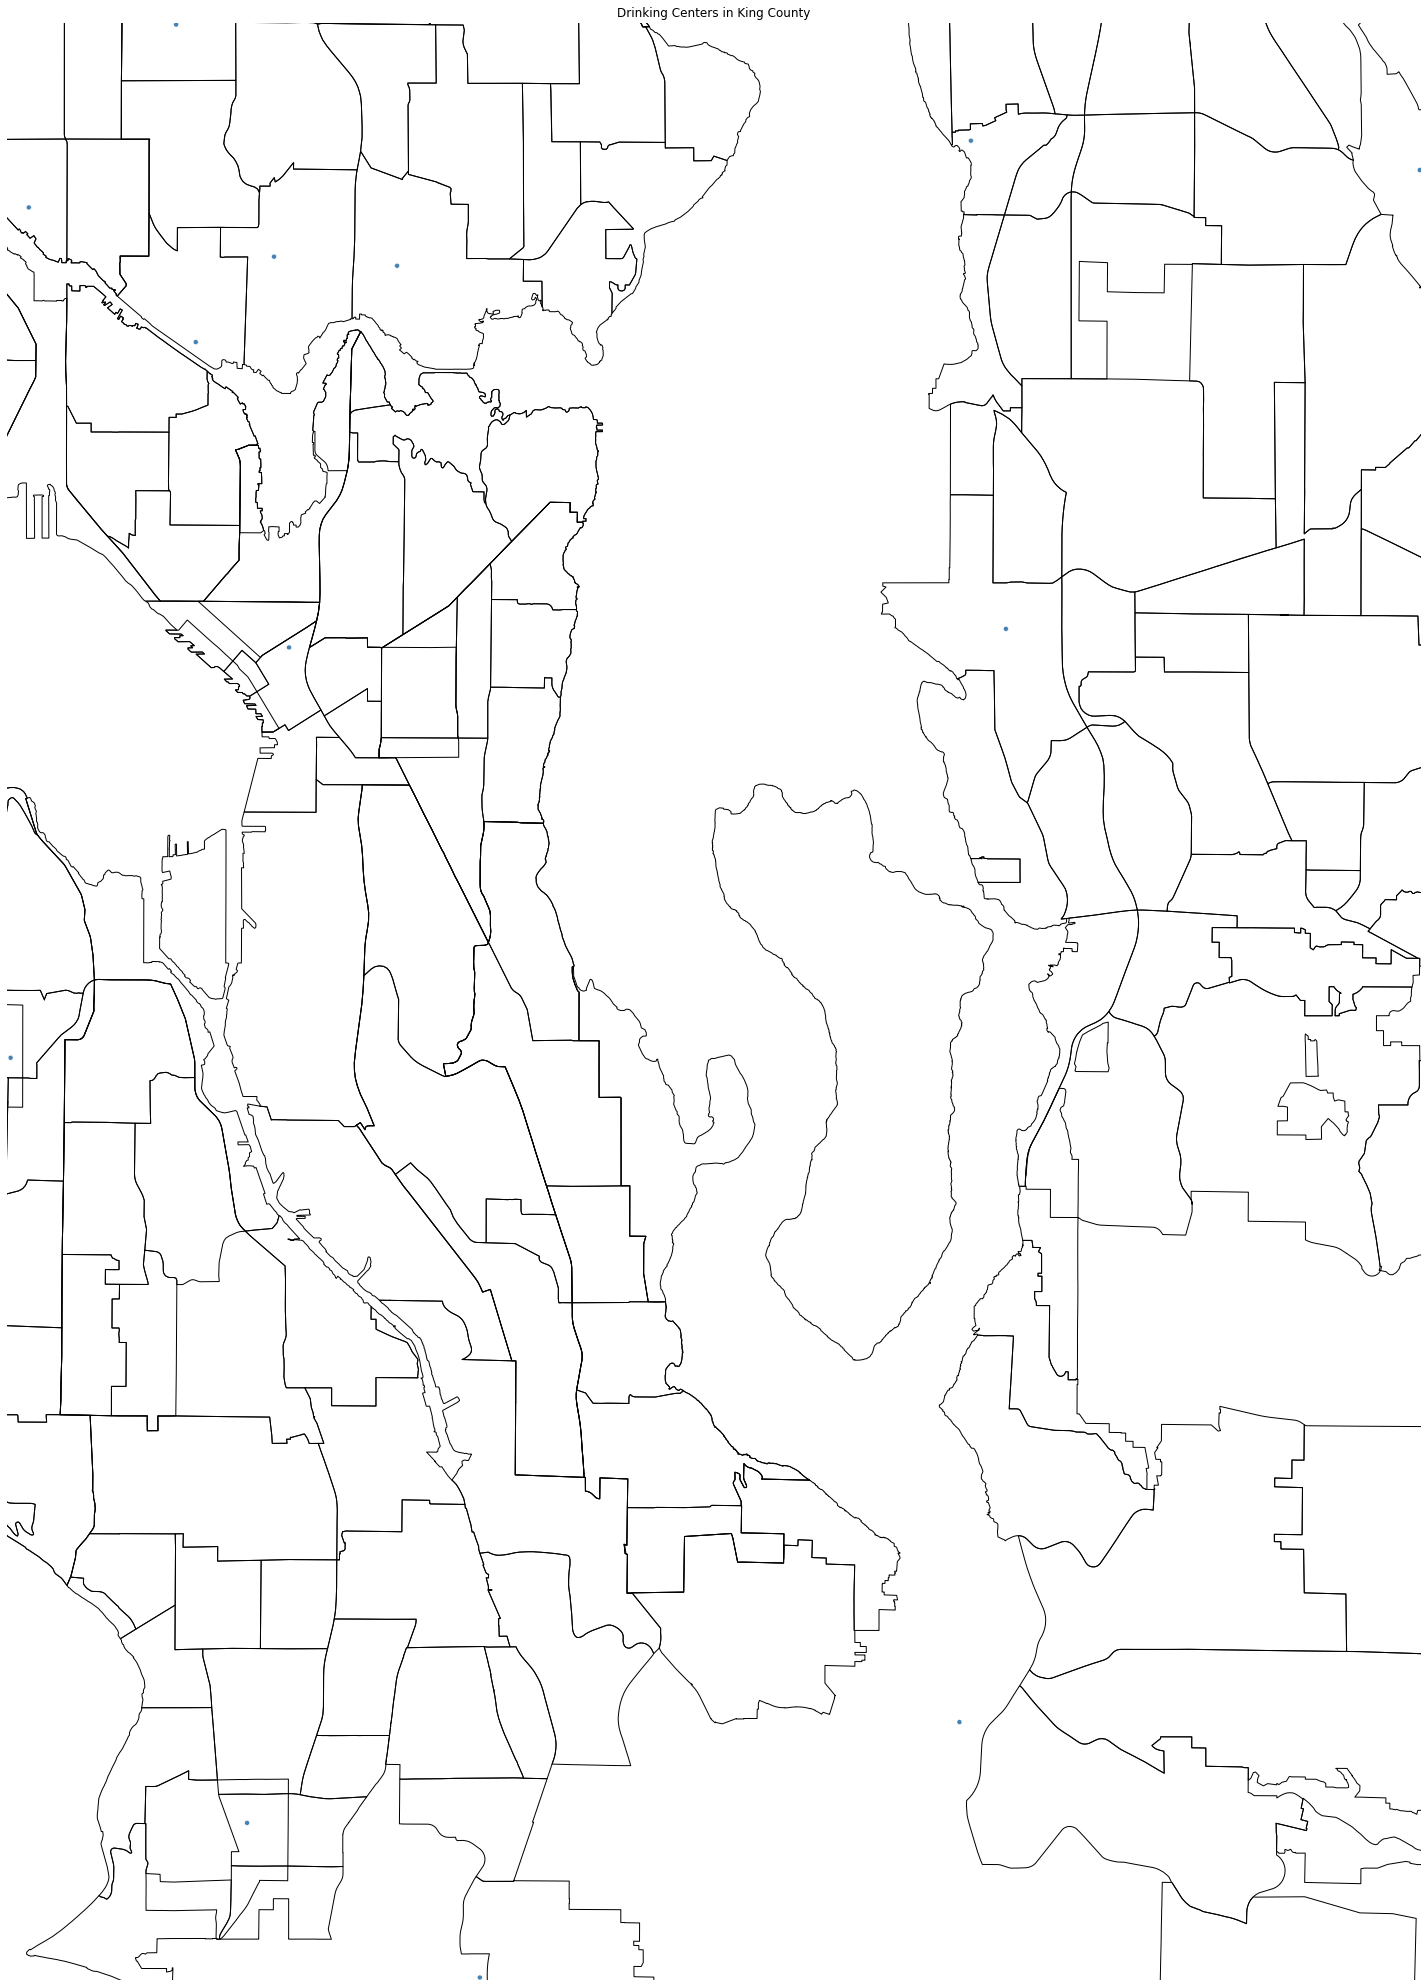

In [68]:
ax1 = plt.subplot(121, projection=gcrs.AlbersEqualArea(central_latitude=47.5, central_longitude=-122.1))
geoplot.polyplot(df_SEA, ax=ax1, projection=gcrs.AlbersEqualArea())
geoplot.pointplot(WA_gdf_clustercentroids, projection=gcrs.AlbersEqualArea(),
#               hue='Loc City', categorical=True,
               edgecolor='white', linewidth=0.5, zorder=10,
#               scale='NUMBER OF DRINKING ESTABLISMENTS', 
#                limits=(2, 8),
#               legend=True, legend_var='scale', legend_kwargs={'loc': 'upper right'},
#              legend_values=[2, 1], 
#                 legend_labels=['2 Establishments', '1 Establishment'],
               ax=ax1)
plt.title("Drinking Centers in King County")

plt.savefig("King_County_Cent3.png", bbox_inches='tight', pad_inches=0)

In [69]:
upload_file_cos(credentials_3,'King_County_Cent3.png','King_County_Cent3.png')

File Uploaded
